In [3]:
import os, json

walk = sorted(os.walk("."), key=lambda x: x[0])[::-1]

for dirpath, dirnames, filenames in walk:
    if "testingSetScores.json" in filenames:
        data = json.load(open(os.path.join(dirpath, "testingSetScores.json"), "r"))
        deltas = []
        # sort data
        data = dict(sorted(data.items(), key=lambda x: x[1]["ID"]))
        for k in data:
            initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
            optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
            delta = optimized_prompt_score - initial_prompt_score
            deltas.append(delta)
        print(f"{dirpath}: {deltas}")
            
        avg_change = sum(deltas) / len(deltas)
        # print(f"Avg change: {dirpath}: {avg_change}")

./trial6: [21.19006462805192, -5.619665042773157, 49.99080331264803, 38.923399304537604, 17.678836894148272, 14.632999787580864, 1.515305962330288, 26.5759843491847, 29.122578825679664, 20.503934848678114, 7.495843362932872, 1.1983185583410574, 24.039106990890858, 23.558378338792, 77.92408012409079, 0.8598667263780868, 13.712903340624976, 48.22680536590862]
./trial5: [21.752286866734057, 20.012407581623208, 43.296874366326996, 40.66216596581637, 11.879926680345946, 14.498195419419115, 6.6525860451762675, 26.609684197742972, 40.830409815348546, 20.786545214231488, 15.987999641611593, 1.1180800149672763, 12.2044825510064, 15.952381293692294, 24.014946607304783, 1.4157891601196724, 30.384960667317053, 51.99135473454757]
./trial4: [21.197346847791753, 19.820245123524913, 51.76958738460222, 36.06147087133858, 12.627011560643329, 14.555462736118695, 11.94107818964445, 25.71208766045077, 64.23078532482691, 20.423443412008325, 16.20645821741856, 0.8202514512256016, 19.33078805101149, 16.047898

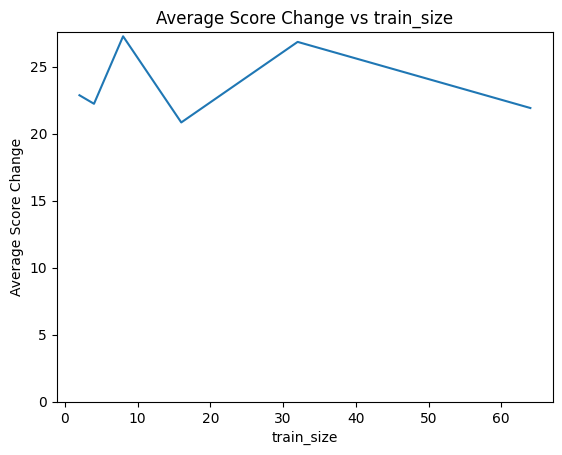

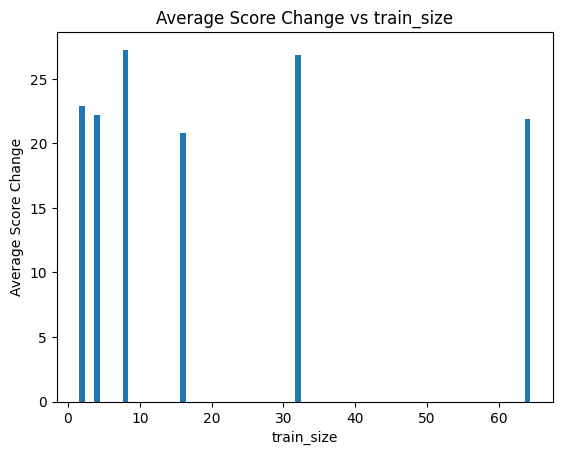

In [8]:
seed_to_score = {64: 21.909753275204555, 32: 26.84463869097327, 16: 20.833110204232188, 8: 27.26285682275217, 4: 22.225059823518425, 2: 22.862752537668083}
# plot seed_to_score as line graph
import matplotlib.pyplot as plt
plt.plot(seed_to_score.keys(), seed_to_score.values())
plt.xlabel("train_size")
plt.ylabel("Average Score Change")
plt.title("Average Score Change vs train_size")
plt.ylim(bottom=0)  # This line sets the y-axis to start from 0
plt.show()

# bar graph
plt.bar(seed_to_score.keys(), seed_to_score.values())
plt.xlabel("train_size")
plt.ylabel("Average Score Change")
plt.title("Average Score Change vs train_size")
plt.show()

In [5]:
import os, json, math

walk = sorted(os.walk("."), key=lambda x: x[0])[::-1]

for dirpath, dirnames, filenames in walk:
    train_scores = []
    test_scores = []
    
    if "trainSetScores.json" in filenames:
        data = json.load(open(os.path.join(dirpath, "trainSetScores.json"), "r"))
        # sort data
        data = dict(sorted(data.items(), key=lambda x: x[1]["ID"]))
        for k in data:
            initial_prompt_score = data[k]["initial_train_score"]
            optimized_prompt_score = data[k]["optimized_train_score"]
            train_scores.append((initial_prompt_score, optimized_prompt_score))
            
    if "testingSetScores.json" in filenames:
        data = json.load(open(os.path.join(dirpath, "testingSetScores.json"), "r"))
        deltas = []
        # sort data
        data = dict(sorted(data.items(), key=lambda x: x[1]["ID"]))
        for k in data:
            initial_prompt_score = list(data[k]["initial_prompt"].values())[0]
            optimized_prompt_score = list(data[k]["optimized_prompt"].values())[0]
            test_scores.append((initial_prompt_score, optimized_prompt_score))
    
    if train_scores and test_scores:
        avg_diff = []
        for train, test in zip(train_scores, test_scores):
            initial_train_score = train[0]
            optimized_train_score = train[1]
            initial_test_score = test[0]
            optimized_test_score = test[1]
            diff = abs(initial_test_score-initial_train_score) + abs(optimized_test_score-optimized_train_score) / 2
            avg_diff.append(diff)
        
        # avg of avg_diff
        avg = sum(avg_diff) / len(avg_diff)
        print(f"{dirpath}: {avg}")

./trial6: 9.514876939618839
./trial5: 4.188424737081236
./trial4: 3.1433355732961825
./trial3: 2.3669770297969692
./trial2: 2.0003714162684116
./trial1: 1.9536158293967343


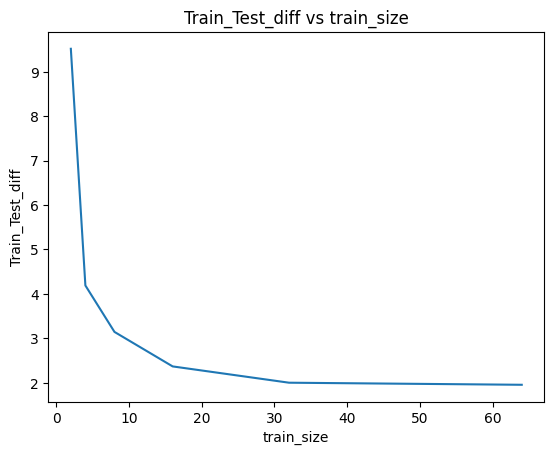

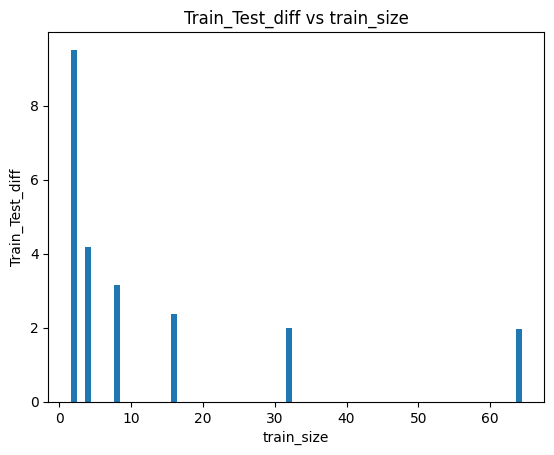

In [7]:
seed_to_score = {64: 1.9536158293967343, 32: 2.0003714162684116, 16: 2.3669770297969692, 8: 3.1433355732961825, 4: 4.188424737081236, 2: 9.514876939618839}
# plot seed_to_score as line graph
import matplotlib.pyplot as plt
plt.plot(seed_to_score.keys(), seed_to_score.values())
plt.xlabel("train_size")
plt.ylabel("Train_Test_diff")
plt.title("Train_Test_diff vs train_size")
plt.show()

# bar graph
plt.bar(seed_to_score.keys(), seed_to_score.values())
plt.xlabel("train_size")
plt.ylabel("Train_Test_diff")
plt.title("Train_Test_diff vs train_size")
plt.show()